# ANN in classification Fraud data with neural nets

In [153]:
# # ANN classification

# In[9]:


import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import numpy as np
from keras.layers import LSTM, Dense,Flatten, Dropout, Activation, Conv1D, Conv2D, ReLU
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.utils import resample
from keras import optimizers
from sklearn.model_selection import train_test_split
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from sklearn import datasets
import imblearn
from sklearn.preprocessing import LabelEncoder
from autokeras import StructuredDataClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.metrics import accuracy_score
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
# ## Load the data

# In[2]:


#Importing traing data
dataset = pd.read_csv('https://raw.githubusercontent.com/IBM/xgboost-smote-detect-fraud/master/data/creditcard.csv')
X = dataset.iloc[:, 0:30]
y = dataset.iloc[:, 30:31]


#preview
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,10,0.385,0.616,-0.874,-0.094,2.925,3.317,0.470,0.538,-0.559,0.310,-0.259,-0.326,-0.090,0.363,0.929,-0.129,-0.810,0.360,0.708,0.126,0.050,0.238,0.009,0.997,-0.767,-0.492,0.042,-0.054,9.99
1,12,-0.752,0.345,2.057,-1.469,-1.158,-0.078,-0.609,0.004,-0.436,0.748,-0.794,-0.770,1.048,-1.067,1.107,1.660,-0.279,-0.420,0.433,0.263,0.500,1.354,-0.257,-0.065,-0.039,-0.087,-0.181,0.129,15.99
2,25,1.114,0.086,0.494,1.336,-0.300,-0.011,-0.119,0.189,0.206,0.082,1.134,0.627,-1.493,0.521,-0.675,-0.529,0.158,-0.399,-0.146,-0.274,-0.053,-0.005,-0.031,0.198,0.565,-0.338,0.029,0.004,4.45
3,33,-0.936,0.170,2.746,-1.078,-0.306,0.012,-0.296,0.403,-0.040,-0.852,1.552,0.954,0.415,-0.234,0.452,0.844,-0.823,0.339,-1.214,-0.005,0.401,1.065,-0.158,0.296,-0.259,0.754,0.047,0.094,9.10
4,35,1.199,0.130,0.864,1.003,-0.784,-0.885,-0.041,-0.208,0.392,-0.248,-0.095,1.314,1.092,-0.409,-0.578,-0.581,0.212,-0.893,-0.021,-0.073,-0.042,0.198,-0.033,1.013,0.559,0.402,-0.006,0.018,0.99


In [31]:
X.shape

(56874, 30)

In [54]:

# scaling and standardizing

scaler = preprocessing.StandardScaler().fit(X)


X_scaled = scaler.transform(X)
X_scaled


array([[-1.99820491,  0.19366191,  0.38129036, ...,  0.09882734,
        -0.17868516, -0.33462126],
       [-1.99816284, -0.3945347 ,  0.21241036, ..., -0.45915227,
         0.4080227 , -0.30897149],
       [-1.99788936,  0.57079061,  0.05100844, ...,  0.06629938,
         0.00726596, -0.35830454],
       ...,
       [ 1.63622332, -0.45247491,  0.54269229, ..., -0.19892859,
         0.06818099, -0.2904609 ],
       [ 1.63634954,  0.96964688, -0.09232146, ...,  0.03877573,
        -0.13700646, -0.12083043],
       [ 1.63639162,  0.10830356,  0.54643133, ...,  0.44662629,
         0.68374334, -0.2745153 ]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


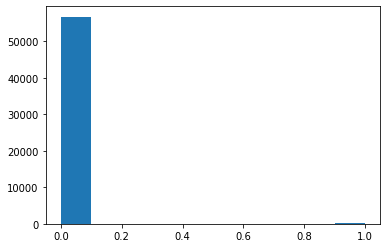

In [117]:
# In[14]:





# ## Oversampling imbalanced data 

# In[3]:


counts, bins = np.histogram(y)
plt.hist(bins[:-1], bins, weights=counts)


# In[32]:


# transform the dataset with Synthetic Minority Oversampling Technique
oversample = SMOTE(sampling_strategy=0.8)
Xo, yo = oversample.fit_resample(X_scaled, y)


# Split the data up in train and test sets

X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size=0.3, random_state=0)

## training the keras model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/20
895/895 [==============================] - 2s 2ms/step - loss: 0.1496 - accuracy: 0.9360 - val_loss: 0.0218 - val_accuracy: 0.9966
Epoch 2/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0181 - accuracy: 0.9963 - val_loss: 0.0145 - val_accuracy: 0.9969
Epoch 3/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0106 - accuracy: 0.9978 - val_loss: 0.0155 - val_accuracy: 0.9969
Epoch 4/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0088 - accuracy: 0.9983 - val_loss: 0.0162 - val_accuracy: 0.9959
Epoch 5/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0129 - accuracy: 0.9968 - val_loss: 0.0249 - val_accuracy: 0.9960
Epoch 6/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.0083 - val_accuracy: 0.9983
Epoch 7/20
895/895 [==============================] - 2s 2ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0103 - val_accuracy: 0.9975
Epoch 

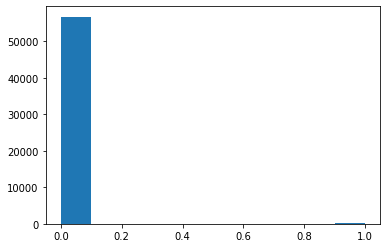

In [109]:



# In[33]:


#counts, bins = np.histogram(yo)
#plt.hist(bins[:-1], bins, weights=counts)


# ## Training the model 

# In[36]:


# Initialize the NN 
model = Sequential()

# Add input layer 
model.add(Dense(4,  input_shape=(30,), activation='relu'))
#model.add(Dropout(0.01))
#hidden layer

model.add(Dense(4,  activation='relu'))

#model.add(Dense(64,  activation='relu'))
#model.add(Dense(64,  activation='relu'))
#model.add(Dropout(0.01))
# Add output layer 
model.add(Dense(1, activation='sigmoid'))


opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



#train the model
history=model.fit(X_train, y_train,validation_split=0.4,epochs=20, batch_size=48, verbose=1)


# In[12]:


model.summary()


# ## Evaluating the model

# In[37]:


#evaluate the model
score = model.evaluate(X_test, y_test)
print(score)


# In[38]:




## propsal from autokeras

In [161]:

#counts, bins = np.histogram(yo)
#plt.hist(bins[:-1], bins, weights=counts)


# ## Training the model 

# In[36]:


# Initialize the NN 
model = Sequential()

# Add input layer 
model.add(Dense(4,  input_shape=(30,), activation='relu'))
#model.add(Dropout(0.01))
#hidden layer

model.add(ReLU())
model.add(Dense(4,  activation='relu'))
model.add(LayerNormalization())
#model.add(CategoryEncoding())
#layer = tf.keras.layers.experimental.preprocessing.CategoryEncoding()
#model.add(tf.keras.layers.experimental.preprocessing.CategoryEncoding())
#model.add(Dense(64,  activation='relu'))
#model.add(Dense(64,  activation='relu'))
#model.add(Dropout(0.01))
# Add output layer 
model.add(Dense(1, activation='sigmoid'))


opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



#train the model
history=model.fit(X_train, y_train,validation_split=0.4,epochs=5, batch_size=100, verbose=1)


# In[12]:


model.summary()


# ## Evaluating the model

# In[37]:


#evaluate the model
#score = model.evaluate(X_test, y_test)
#print(score)

Epoch 1/5
430/430 [==============================] - 2s 3ms/step - loss: 0.2418 - accuracy: 0.9017 - val_loss: 0.0348 - val_accuracy: 0.9897
Epoch 2/5
430/430 [==============================] - 1s 2ms/step - loss: 0.0354 - accuracy: 0.9901 - val_loss: 0.0466 - val_accuracy: 0.9783
Epoch 3/5
146/430 [=========>....................] - ETA: 0s - loss: 0.0366 - accuracy: 0.9845

KeyboardInterrupt: ignored

In [111]:
#evaluate the model
score = model.evaluate(X_test, y_test)
print(score)


959/959 [==============================] - 1s 999us/step - loss: 0.0084 - accuracy: 0.9983
[0.008354807272553444, 0.9983038306236267]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


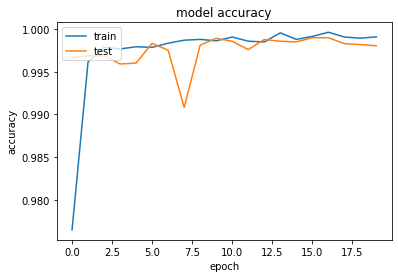

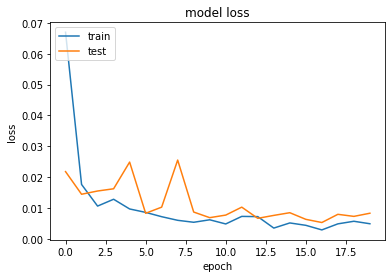

In [110]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [121]:
#pip install autokeras

## autokeras search for best model params

In [168]:
# define the search
search = StructuredDataClassifier(max_trials=4,metrics=['accuracy'])

# perform the search
history=search.fit(x=X_train, y=y_train)
# evaluate the model
loss, acc = search.evaluate(X_test, y_test)
print('Accuracy: %.3f' % acc)
# use the model to make a prediction
#row = [0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032]

row=[10,0.385,0.616,-0.874,-0.094,2.925,3.317,0.470,0.538,-0.559,0.310,-0.259,-0.326,-0.090,0.363,0.929,-0.129,-0.810,0.360,0.708,0.126,0.050,0.238,0.009,0.997,-0.767,-0.492,0.042,-0.054,9.990]
#X_new = asarray([row]).astype('float32')
#yhat = search.predict(X_new)
#print('Predicted: %.3f' % yhat[0])
# get the best performing model
model = search.export_model()
# summarize the loaded model
model.summary()
# save the best performing model to file
#model.save('model_sonar.h5')

INFO:tensorflow:Reloading Oracle from existing project ./structured_data_classifier/oracle.json
INFO:tensorflow:Reloading Tuner from ./structured_data_classifier/tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/15
2236/2236 [==============================] - 5s 2ms/step - loss: 0.0979 - accuracy: 0.9644
Epoch 2/15
2236/2236 [==============================] - 4s 2ms/step - loss: 0.0049 - accuracy: 0.9993
Epoch 3/15
2236/2236 [==============================] - 4s 2ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 4/15
2236/2236 [==============================] - 4s 2ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 5/15
2236/2236 [==============================] - 4s 2ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 6/15
2236/2236 [==============================] - 4s 2ms/step - loss: 9.1980e-04 - accuracy: 0.9999
Epoch 7/15
2236/2236 [==============================] - 4s 2ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 8/15
2236/2236 [==============================] - 4s 2ms/step - 

In [169]:
score = model.evaluate(X_test, y_test)
print(score)

959/959 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 0.9998
[0.0015881425933912396, 0.9997716546058655]


## evaluation the model los vs accuracy

In [127]:
#evaluate the model
score = model.evaluate(X_test, y_test)
print(score)

959/959 [==============================] - 1s 1ms/step - loss: 8.6154e-05 - accuracy: 1.0000
[8.615421393187717e-05, 0.9999673962593079]


## plot the models loss vs. accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


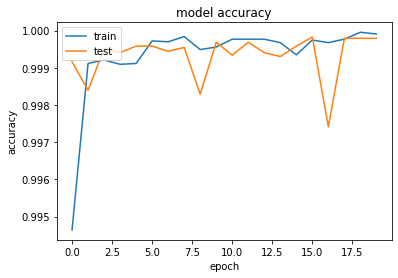

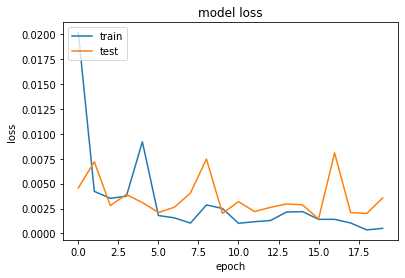

In [108]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


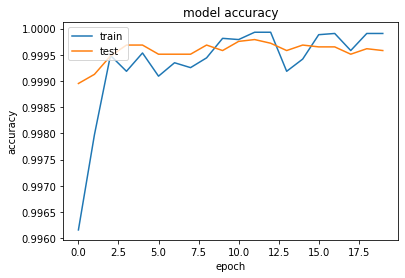

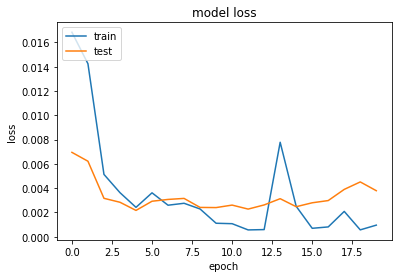

In [106]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


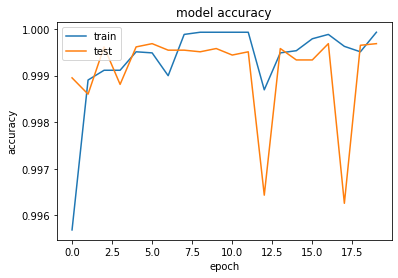

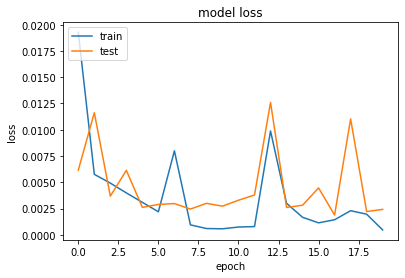

In [104]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


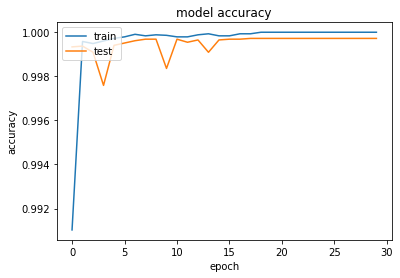

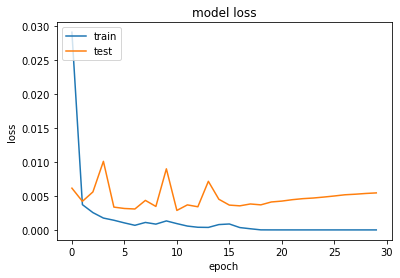

In [61]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


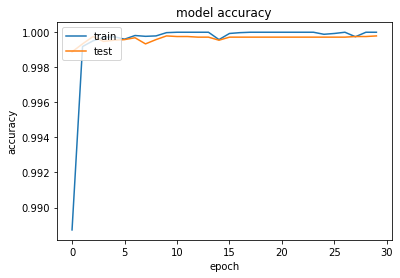

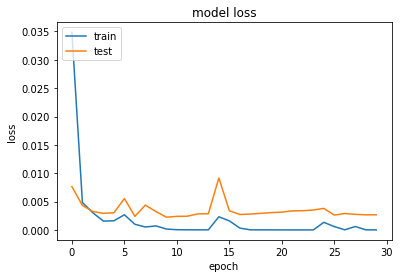

In [58]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


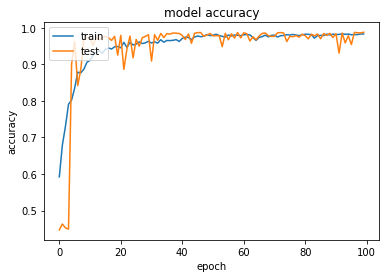

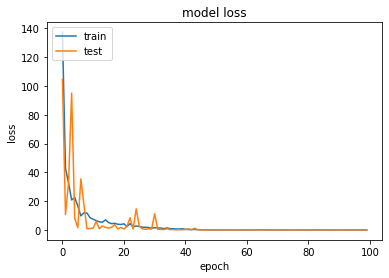

In [51]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


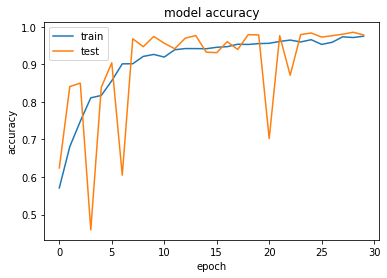

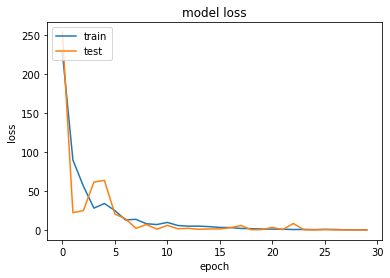

In [48]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


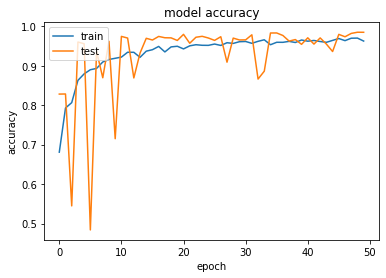

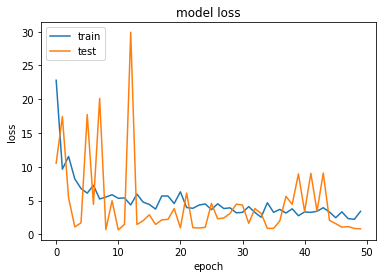

In [37]:
  # list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


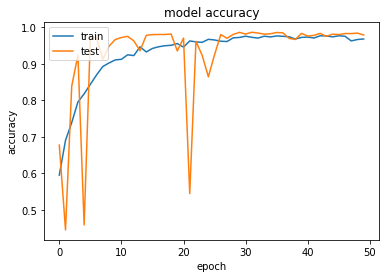

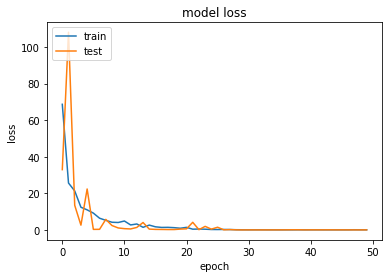

In [40]:
 # list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


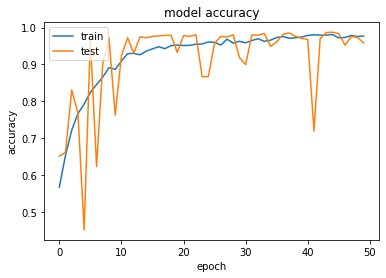

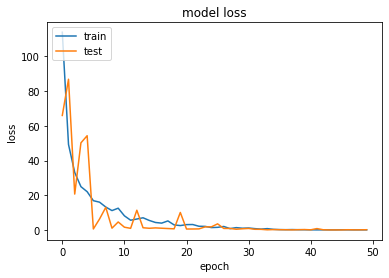

In [46]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()